# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./train.p"
validation_file="./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Print relevant statistics about the dataset
import numpy as np

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
# print("Original image size =", train['sizes'])

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s)

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

In [3]:
# Load 'signnames.csv' and create dictionary for mapping sign id to sign description

from csv import DictReader

sign_dict = {}
with open("signnames.csv") as file:
    csv_reader = DictReader(file)
    for row in csv_reader:
        sign_idx = int(row['ClassId'])
        sign_dict[sign_idx] = row['SignName']
# print(sign_dict)

Class 0: Speed limit (20km/h)                                180 samples


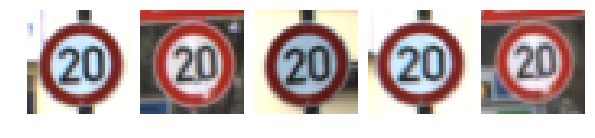

Class 1: Speed limit (30km/h)                                1980 samples


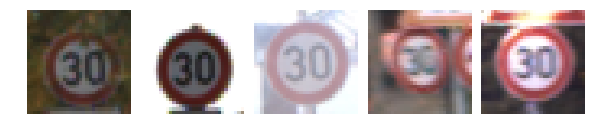

Class 2: Speed limit (50km/h)                                2010 samples


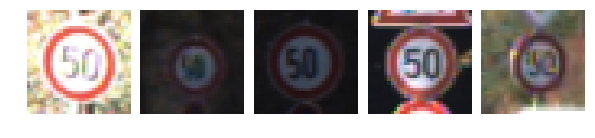

Class 3: Speed limit (60km/h)                                1260 samples


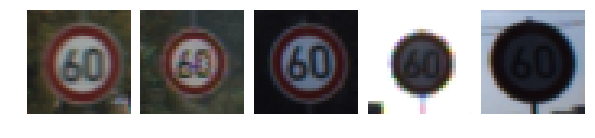

Class 4: Speed limit (70km/h)                                1770 samples


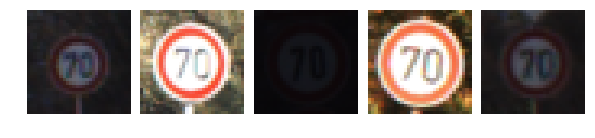

Class 5: Speed limit (80km/h)                                1650 samples


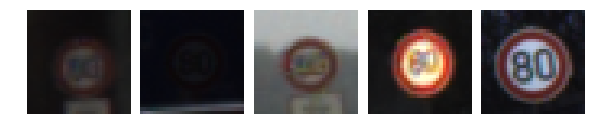

Class 6: End of speed limit (80km/h)                         360 samples


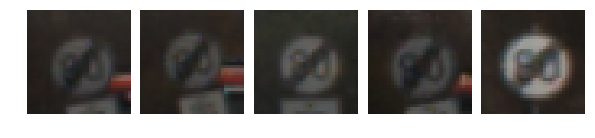

Class 7: Speed limit (100km/h)                               1290 samples


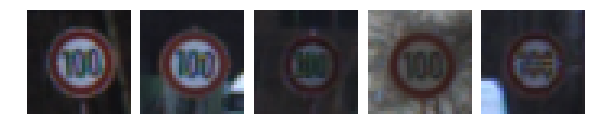

Class 8: Speed limit (120km/h)                               1260 samples


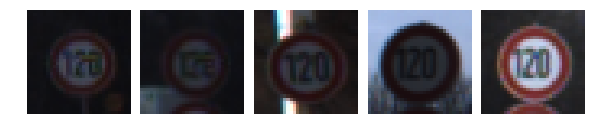

Class 9: No passing                                          1320 samples


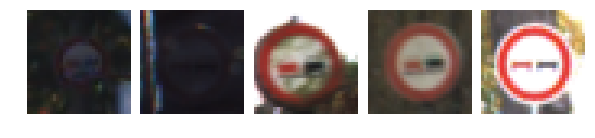

Class 10: No passing for vehicles over 3.5 metric tons        1800 samples


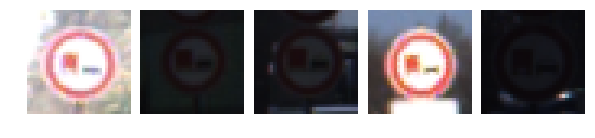

Class 11: Right-of-way at the next intersection               1170 samples


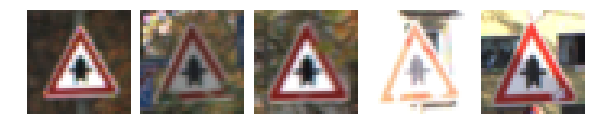

Class 12: Priority road                                       1890 samples


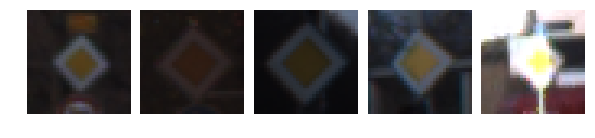

Class 13: Yield                                               1920 samples


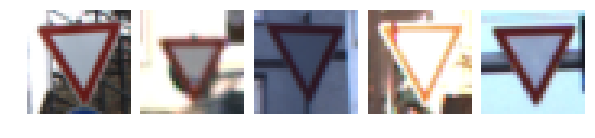

Class 14: Stop                                                690 samples


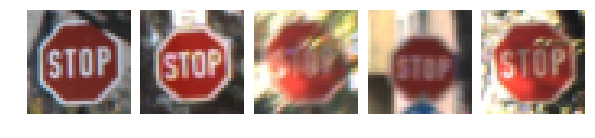

Class 15: No vehicles                                         540 samples


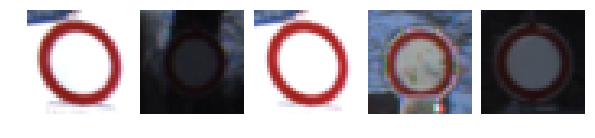

Class 16: Vehicles over 3.5 metric tons prohibited            360 samples


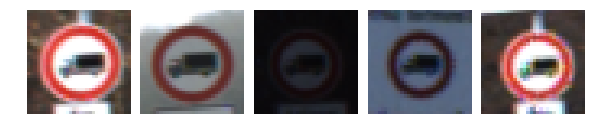

Class 17: No entry                                            990 samples


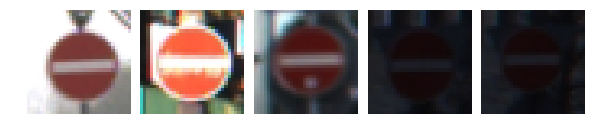

Class 18: General caution                                     1080 samples


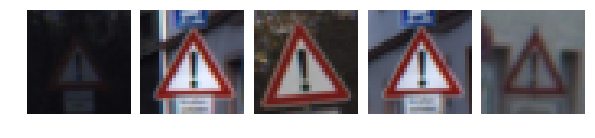

Class 19: Dangerous curve to the left                         180 samples


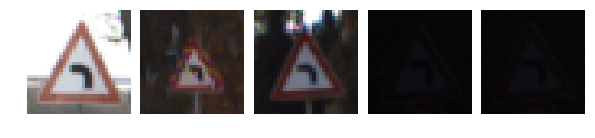

Class 20: Dangerous curve to the right                        300 samples


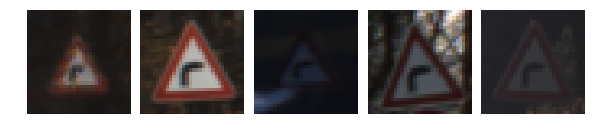

Class 21: Double curve                                        270 samples


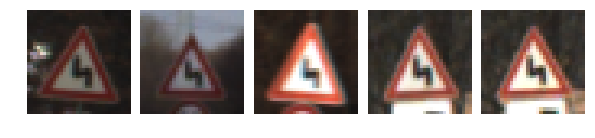

Class 22: Bumpy road                                          330 samples


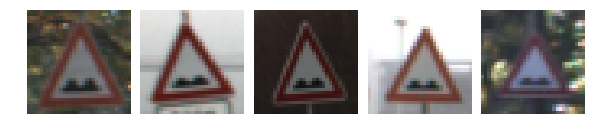

Class 23: Slippery road                                       450 samples


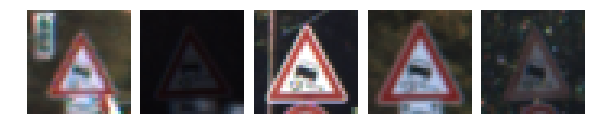

Class 24: Road narrows on the right                           240 samples


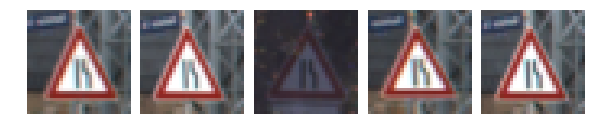

Class 25: Road work                                           1350 samples


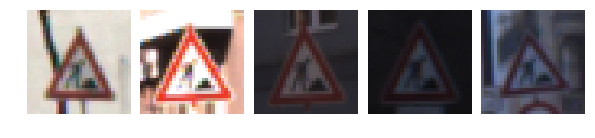

Class 26: Traffic signals                                     540 samples


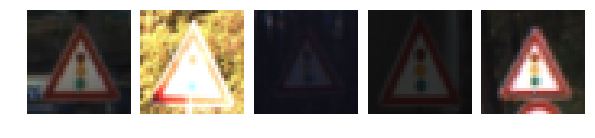

Class 27: Pedestrians                                         210 samples


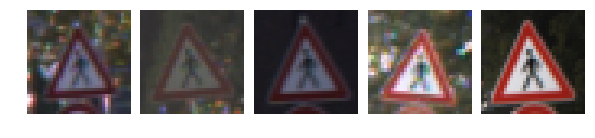

Class 28: Children crossing                                   480 samples


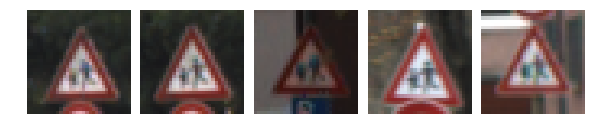

Class 29: Bicycles crossing                                   240 samples


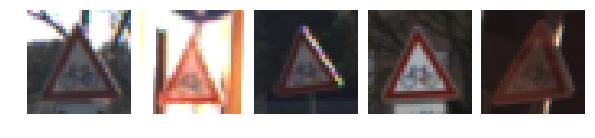

Class 30: Beware of ice/snow                                  390 samples


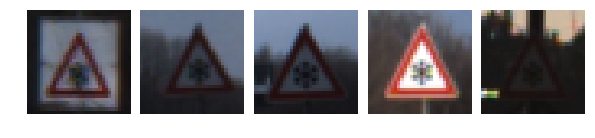

Class 31: Wild animals crossing                               690 samples


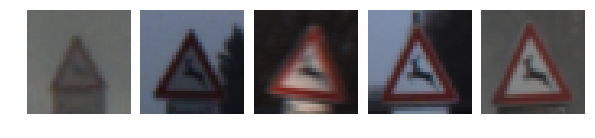

Class 32: End of all speed and passing limits                 210 samples


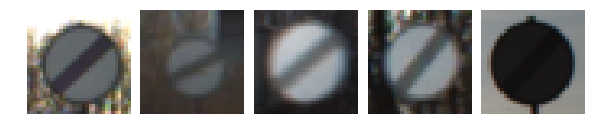

Class 33: Turn right ahead                                    599 samples


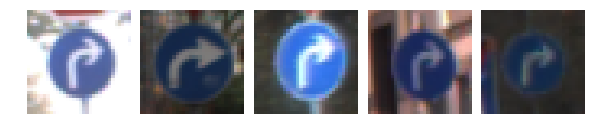

Class 34: Turn left ahead                                     360 samples


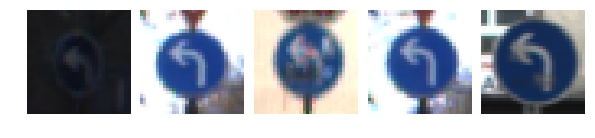

Class 35: Ahead only                                          1080 samples


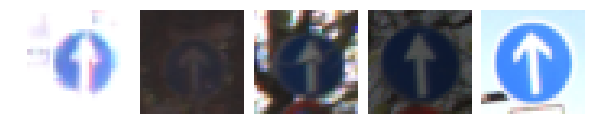

Class 36: Go straight or right                                330 samples


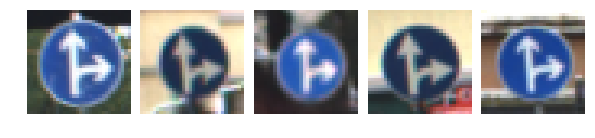

Class 37: Go straight or left                                 180 samples


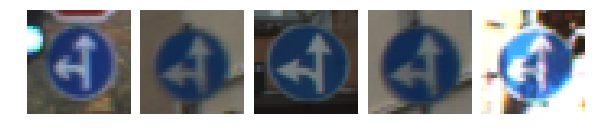

Class 38: Keep right                                          1860 samples


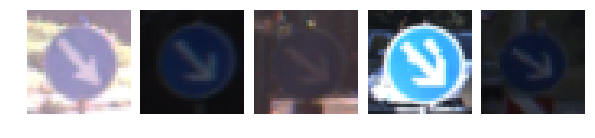

Class 39: Keep left                                           270 samples


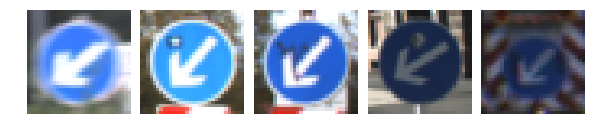

Class 40: Roundabout mandatory                                300 samples


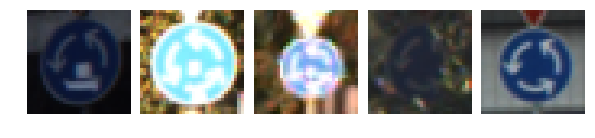

Class 41: End of no passing                                   210 samples


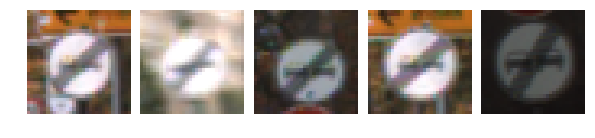

Class 42: End of no passing by vehicles over 3.5 metric tons  210 samples


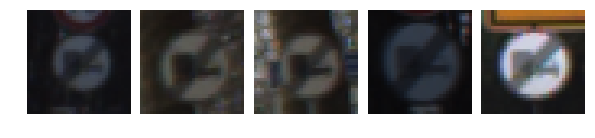

In [4]:
### Logic for visualzing 5 random examples for each traffic sign type from the training data

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

from random import sample

train_sign_label, train_sign_inds, train_sign_counts = np.unique(y_train, return_index = True, return_counts = True)

for sign_label, sign_idx, sign_count in zip(train_sign_label, train_sign_inds, train_sign_counts):
    print("Class %i: %-*s  %i samples" % (sign_label, 50, sign_dict[sign_label], sign_count))
    
    fig, axs = plt.subplots(1,5, figsize=(10, 5))
    fig.subplots_adjust(hspace = .05, wspace=.1)
    axs = axs.ravel()
    
    rand_inds = sample(range(sign_idx, sign_idx + sign_count), 5)
    for i in range(5):
        axs[i].axis('off')
        axs[i].imshow(X_train[rand_inds[i]])
    plt.show()

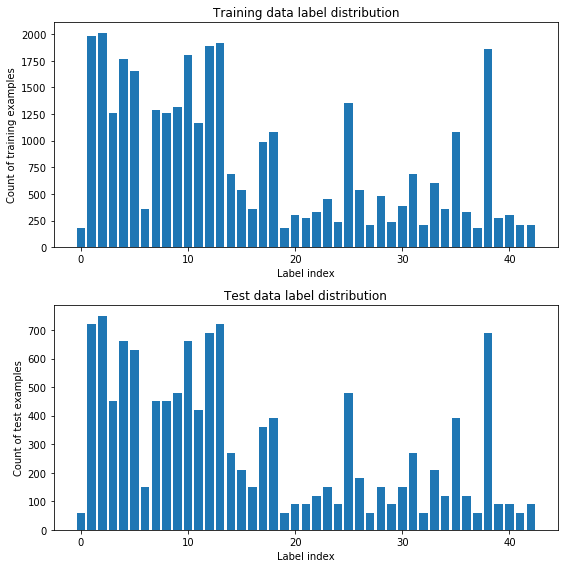

In [5]:
### Visualizing the distribution of labels for the train & test datasets

train_sign_inds, train_sign_counts = np.unique(y_train, return_counts = True)
test_sign_inds, test_sign_counts = np.unique(y_test, return_counts = True)

# Plot the distribution split of the datasets
plt.figure(1, figsize = (8,8))
plt.xlim([-1,43])

plt.subplot(211)
plt.bar(np.arange(43), train_sign_counts, width=0.8, align='center')
plt.xlabel('Label index')
plt.ylabel('Count of training examples')
plt.title('Training data label distribution')

plt.subplot(212)
plt.bar(np.arange(43), test_sign_counts, width=0.8, align='center')
plt.xlabel('Label index')
plt.ylabel('Count of test examples')
plt.title('Test data label distribution')

plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 implementation, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.98. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

In [6]:
### Data Preprocessing function definition

from skimage import exposure
import warnings

# Histogram Equalization- Used to enhance images with low contrast, which “spreads out" the most frequent intensity values
# and results in all images with similar lighting conditions
def contrast_normalize(img):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        new_img = exposure.equalize_adapthist(img)
        return new_img

# Converting image from RGB to grayscale and normalizing pixel values
def preprocessing(data, hist_equalize=True):
    data_new = []
    for img in data:
        r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        gray = ((gray - 128.0)/128.0).astype(np.float32)
        if hist_equalize:
            gray = contrast_normalize(gray)
        data_new.append(gray[:,:,np.newaxis])
    return np.array(data_new)

Original image shape is:  (32, 32, 3)
Grayscale normalized image shape is:  (32, 32, 1) 



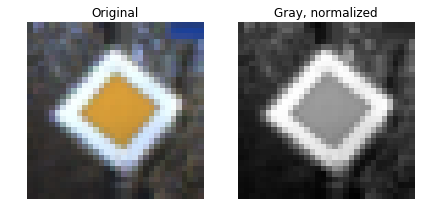

In [7]:
# Visualizing effect of pre-processing on a random image

rand_img = X_train[28794]
print("Original image shape is: ", rand_img.shape)
rand_gray_norm = preprocessing([rand_img], hist_equalize=False)[0]
print("Grayscale normalized image shape is: ", rand_gray_norm.shape,"\n")

fig, axs = plt.subplots(1,2, figsize=(6, 4))

axs[0].axis('off')
axs[0].imshow(rand_img)
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(rand_gray_norm.squeeze(), cmap='gray')
axs[1].set_title('Gray, normalized')

plt.tight_layout()
plt.show()

In [8]:
### All datasets preprocessing execution

X_train = preprocessing(X_train, hist_equalize = False).reshape(*X_train.shape[:-1], -1)
X_valid = preprocessing(X_valid, hist_equalize = False).reshape(*X_valid.shape[:-1], -1)
X_test = preprocessing(X_test, hist_equalize = False).reshape(*X_test.shape[:-1], -1)

print("Datasets preprocessing done!")

Datasets preprocessing done!


### Data augmentation functions definition

In [9]:
# Applying random geometrical transformation on input image like translation, rotation and perspective transformation
# P.S- np.random.uniform has to be used rather than random.uniform when more than one number required as output

from numpy.random import uniform
import cv2

def geom_transform(img, max_offset=5, max_angle=10, projection_lim=0.2, transl = True, rot = True, persp = True):
    
    height,width = img.squeeze().shape
    
    # Translation
    if transl:
        t_offsets = max_offset * uniform(-1, 1, (2,))
        translate_mat = np.array([[1, 0, t_offsets[0]], [0, 1, t_offsets[1]]])
        img = cv2.warpAffine(img, translate_mat, (width, height), borderMode=cv2.BORDER_REPLICATE)
        img = img.squeeze()
    
    # Rotation
    if rot:
        angle = uniform(-max_angle, max_angle)
        rot_mat = cv2.getRotationMatrix2D(((width-1)/2.0, (height-1)/2.0), angle, 1)    # Here, '1' is the isotropic scale factor
        img = cv2.warpAffine(img, rot_mat, (width, height), borderMode=cv2.BORDER_REPLICATE)
        img = img.squeeze()
    
    # Perspective Transform
    if persp:
        p_offset = int(projection_lim * width)    # Perspective offset

        # Offsets from each of the 4 corners of the image (8 coordinates)
        persp_pts = uniform(-p_offset, p_offset, (8,))

        pts1 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        pts2 = np.float32([abs(persp_pts[0:2]), [np.minimum(width-persp_pts[2], width), abs(persp_pts[3])], \
                            [abs(persp_pts[4]), np.minimum(height-persp_pts[5], height)], \
                           np.minimum([width,height] - persp_pts[6:8], [width,height])])

        M = cv2.getPerspectiveTransform(pts1,pts2)
        img = cv2.warpPerspective(img,M,(width, height), borderMode=cv2.BORDER_REPLICATE)
        img = img.squeeze()
    
    return img[:,:,np.newaxis]

Original image shape:  (32, 32, 1) 

Translated image shape:  (32, 32, 1) 

Rotated image shape:  (32, 32, 1) 

Translated + Rotated image shape:  (32, 32, 1) 

Perspective transformed image shape:  (32, 32, 1) 



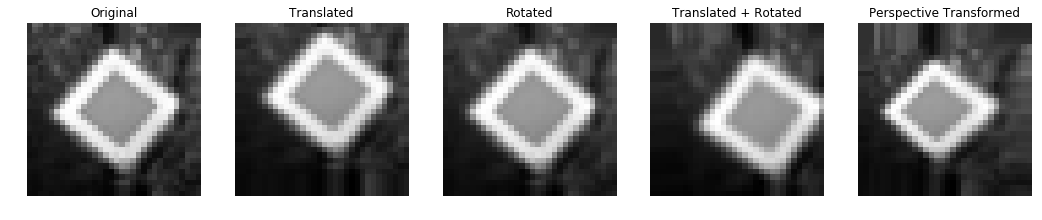

In [10]:
# Visualizing effect of certain affine and perspective trasformations on a random image

rand_img = X_train[28794]
print("Original image shape: ",rand_img.shape, "\n")

# rand_img2 = preprocessing([rand_img], hist_equalize=False)

rand_transl = geom_transform(rand_img, rot = False, persp = False)
print("Translated image shape: ",rand_transl.shape,"\n")
rand_rot = geom_transform(rand_img, transl = False, persp = False)
print("Rotated image shape: ",rand_rot.shape,"\n")
rand_rotransl = geom_transform(rand_img, persp = False)
print("Translated + Rotated image shape: ",rand_rotransl.shape,"\n")
rand_persp = geom_transform(rand_img, transl = False, rot = False)
print("Perspective transformed image shape: ",rand_persp.shape, "\n")

disp_imgs = [rand_img, rand_transl, rand_rot, rand_rotransl,rand_persp]
titles = ['Original','Translated', 'Rotated', 'Translated + Rotated', 'Perspective Transformed']

fig, axs = plt.subplots(1,5, figsize=(18, 5))

for i in range(5):
    axs[i].axis('off')
    axs[i].imshow(disp_imgs[i].squeeze(), cmap = 'gray')
    axs[i].set_title(titles[i])
plt.show()

In [11]:
# Logic for flipping images to result in more images of same class or a complementary class

def flip_img(img, label):
    # Classes of signs that, when flipped horizontally or vertically, remain the same
    flip_either = [12, 15, 17]
    # Classes of signs that, when flipped horizontally, remain the same
    flip_hor = [11, 13, 18, 22, 26, 30, 35]
    # Classes of signs that, when flipped vertically, remain the same
    flip_vert = [1, 5]
    # Classes of signs that, when flipped horizontally and then vertically, remain the same
    flip_both = [32, 40]
    # Classes of signs that, when flipped horizontally, should be classified as some other (complementary) class
    cross_flip_hor = [19, 20, 33, 34, 36, 37, 38, 39]
    cross_label_map = {19: 20, 33: 34, 36: 37, 38: 39}
    
    new_img = None
    if label in flip_either:
        flip_choice = random.choice(['hor','vert'])
        if flip_choice == 'hor':
            new_img = np.fliplr(img)
        else:
            new_img = np.flipud(img)
    elif label in flip_hor:
        new_img = np.fliplr(img)
    elif label in flip_vert:
        new_img = np.flipud(img)
    elif label in flip_both:
        new_img = np.flipud(np.fliplr(img))
    elif label in cross_flip_hor:
        new_img = np.fliplr(img)
        for k, v in cross_label_map.items():
            if label == k:
                label = v
            elif label == v:
                label = k
    
    return new_img, label

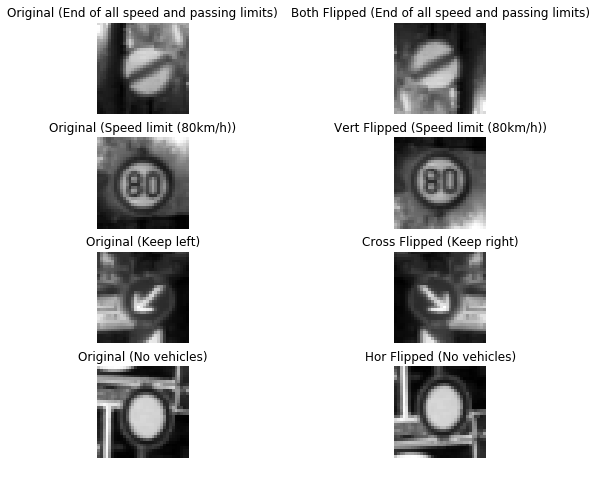

In [12]:
### Testing flipping of certain traffic sign labels for initial data augmentation

import random
from sklearn.utils import shuffle

flip_hor = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]
flip_vert = [1, 5, 12, 15, 17]
flip_both = [32, 40]
cross_flip_hor = [19, 20, 33, 34, 36, 37, 38, 39]
    
rand_hor = random.choice(flip_hor)
rand_vert = random.choice(flip_vert)
rand_both = random.choice(flip_both)
rand_cross = random.choice(cross_flip_hor)

X_temp, y_temp = shuffle(X_train, y_train)

flag_hor = True; flag_vert = True; flag_both = True; flag_cross = True
flags = [flag_hor, flag_vert, flag_both, flag_cross]

disp_imgs = []; disp_labels = []; flip_type = []

for img, label in zip(X_temp, y_temp):
    if any(flags):
        if label == rand_hor and flag_hor == True:
            disp_imgs.append(img), disp_labels.append(sign_dict[label])
            new_img, new_label = flip_img(img, label)
            disp_imgs.append(new_img), disp_labels.append(sign_dict[new_label]), flip_type.append('Hor')
            flag_hor = False
        elif label == rand_vert and flag_vert == True:
            disp_imgs.append(img), disp_labels.append(sign_dict[label])
            new_img, new_label = flip_img(img, label)
            disp_imgs.append(new_img), disp_labels.append(sign_dict[new_label]), flip_type.append('Vert')
            flag_vert = False
        elif label == rand_both and flag_both == True:
            disp_imgs.append(img), disp_labels.append(sign_dict[label])
            new_img, new_label = flip_img(img, label)
            disp_imgs.append(new_img), disp_labels.append(sign_dict[new_label]), flip_type.append('Both')
            flag_both = False
        elif label == rand_cross and flag_cross == True:
            disp_imgs.append(img), disp_labels.append(sign_dict[label])
            new_img, new_label = flip_img(img, label)
            disp_imgs.append(new_img), disp_labels.append(sign_dict[new_label]), flip_type.append('Cross')
            flag_cross = False
    else:
        break

del X_temp; del y_temp

fig, axs = plt.subplots(4,2, figsize=(8, 8))
fig.subplots_adjust(hspace = .25, wspace=1)
axs = axs.ravel()

for i in range(8):
    axs[i].axis('off')
    axs[i].imshow(disp_imgs[i].squeeze(), cmap='gray')
    if i%2 == 0:
        axs[i].set_title('Original '+ '(' + disp_labels[i] + ')')
    else:
        axs[i].set_title(flip_type[(i-1)//2] + ' Flipped '+ '(' + disp_labels[i] + ')')
        
plt.show()

In [20]:
### Executing data augmentation

from numpy import random

def data_augment(X_data_og, y_data_og, num_images = sum(train_sign_counts) * 2):
    
    X_new = np.copy(X_data_og); y_new = np.copy(y_data_og)
    X_data_og, y_data_og = shuffle(X_data_og, y_data_og)
    
    flip_flags = [True for label in range(X_data_og.shape[0])]    #Flags to indicate whether to flip an image
    
    for i in range(num_images):
        
        # Pick a random image from original dataset to transform
        rand_idx = random.randint(X_data_og.shape[0])
        img = X_data_og[rand_idx]
        
        # Flip image only once
        if flip_flags[rand_idx] == True:
            new_img, new_label = flip_img(img, y_data_og[rand_idx])
            flip_flags[rand_idx] = False
            if new_img is not None:
                X_new = np.concatenate((X_new, np.expand_dims(new_img, axis=0)))
                y_new = np.append(y_new, new_label)
                continue
            else:
                pass
        
        # Create transformed image 
        # Applies perspective transform to 1/5th of images and translation+rotation transform to the remaining images
        if i%5 == 0:
            new_img = geom_transform(X_data_og[rand_idx], transl = False, rot = False)
        else:
            new_img = geom_transform(X_data_og[rand_idx], persp = False)
        
        # Add new data to augmented dataset
        X_new = np.concatenate((X_new, np.expand_dims(new_img, axis=0)))
        y_new = np.append(y_new, y_data_og[rand_idx])

        if (i+1) % 1000 == 0:
            print("{} new images generated".format(i+1))
            
    return X_new, y_new

In [15]:
### Prepare training dataset by augmenting original data
from sklearn.utils import shuffle

fname = "./train_extended2.p"

print("No. of training examples in initial dataset =", X_train.shape[0],"\n")

# Prepare a dataset with extended classes
X_train_extended, y_train_extended = data_augment(np.array(X_train), np.array(y_train))
print("No. of training examples after augmenting training data =", X_train_extended.shape[0])

# Store the new data as a dictionary on the disk in the form of a pickle file
with open(fname, mode='wb') as f:
    pickle.dump({"features" : X_train_extended, "labels" : y_train_extended}, f)

No. of training examples in initial dataset = 34799 

3000 new images generated
5000 new images generated
6000 new images generated
8000 new images generated
9000 new images generated
10000 new images generated
12000 new images generated
13000 new images generated
17000 new images generated
18000 new images generated
21000 new images generated
22000 new images generated
23000 new images generated
24000 new images generated
25000 new images generated
26000 new images generated
27000 new images generated
28000 new images generated
29000 new images generated
30000 new images generated
31000 new images generated
32000 new images generated
33000 new images generated
34000 new images generated
36000 new images generated
37000 new images generated
38000 new images generated
40000 new images generated
42000 new images generated
43000 new images generated
44000 new images generated
45000 new images generated
46000 new images generated
47000 new images generated
48000 new images generated
49000 

In [13]:
### Loading preprocessed extended (data augmented) training data

with open("./train_extended2.p", mode='rb') as f:
    train_extended = pickle.load(f)
    
X_train_extended, y_train_extended = train_extended['features'], train_extended['labels']

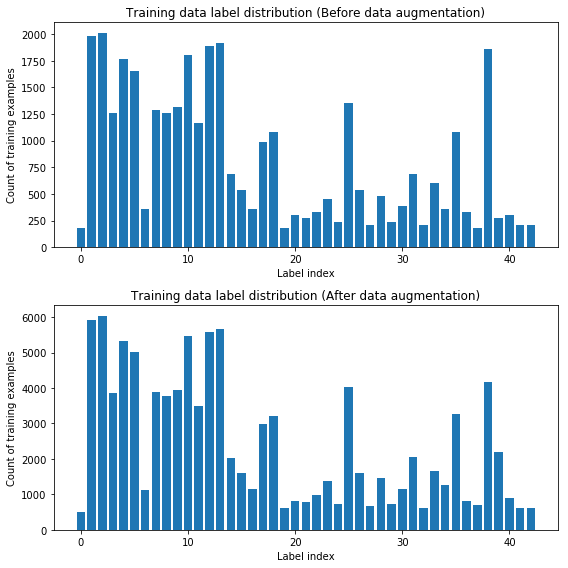

In [14]:
### Visualizing the distribution of labels for the training dataset before & after augmentation

_, train_sign_counts = np.unique(y_train, return_counts = True)
_, train2_sign_counts = np.unique(y_train_extended, return_counts = True)

# Plot the distribution split of the datasets
plt.figure(1, figsize = (8,8))
plt.xlim([-1,43])

plt.subplot(211)
plt.bar(np.arange(43), train_sign_counts, width=0.8, align='center')
plt.xlabel('Label index')
plt.ylabel('Count of training examples')
plt.title('Training data label distribution (Before data augmentation)')

plt.subplot(212)
plt.bar(np.arange(43), train2_sign_counts, width=0.8, align='center')
plt.xlabel('Label index')
plt.ylabel('Count of training examples')
plt.title('Training data label distribution (After data augmentation)')

plt.tight_layout()
plt.show()

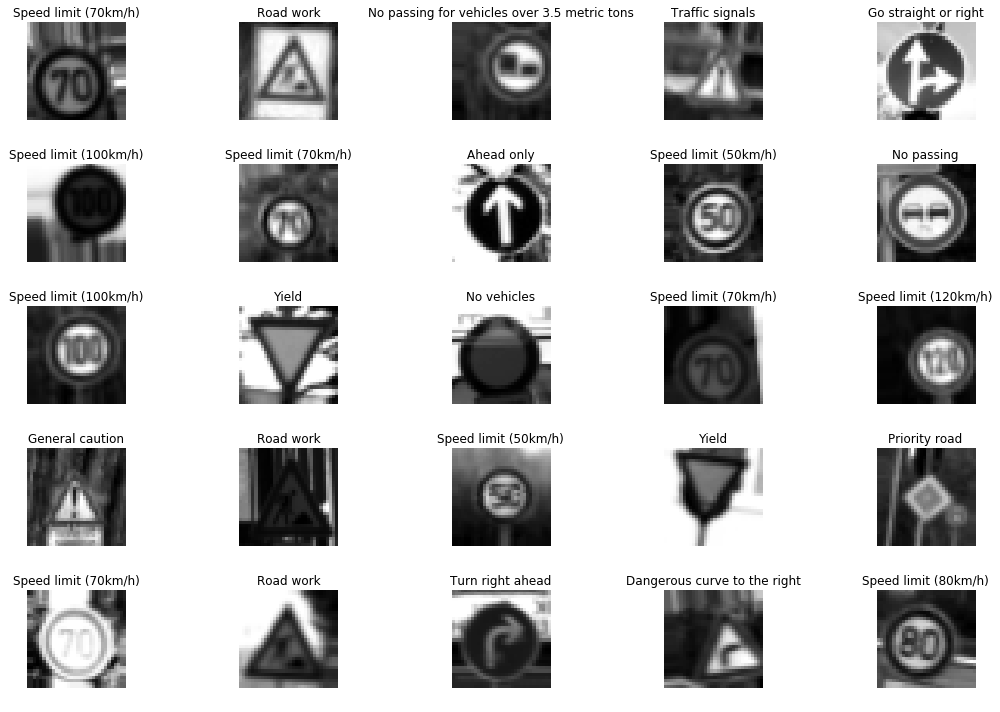

In [18]:
### Logic for visualzing 25 random examples from the training data after augmentation

train_extended_labels, train_extended_counts = np.unique(y_train_extended, return_counts = True)

fig, axs = plt.subplots(5,5, figsize=(14, 10))
axs = axs.ravel()

rand_inds = np.random.randint(0, len(y_train_extended), 25)
for i in range(25):
    axs[i].axis('off')
    axs[i].imshow(X_train_extended[rand_inds[i]].squeeze(), cmap = 'gray')
    axs[i].set_title(sign_dict[y_train_extended[rand_inds[i]]])
plt.tight_layout()
plt.show()

### Model Architecture

In [19]:
### Current Network definiton function

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def traffic_sign_CNN2(x, keep_dropout):
    # Arguments used for initializing parameters pseudo-randomly for each layer
    mu = 0
    sigma = 0.1

    # Setting up dictionaries for weights & biases
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([3,3,1,32], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wc2': tf.Variable(tf.truncated_normal([3,3,32,32], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wc3': tf.Variable(tf.truncated_normal([3,3,32,64], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wc4': tf.Variable(tf.truncated_normal([3,3,64,64], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wc5': tf.Variable(tf.truncated_normal([3,3,64,128], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wc6': tf.Variable(tf.truncated_normal([3,3,128,128], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wfc1': tf.Variable(tf.truncated_normal([3584,1024], mean=mu, stddev=sigma, dtype = tf.float32)),
        'wfc2': tf.Variable(tf.truncated_normal([1024,n_classes], mean=mu, stddev=sigma, dtype = tf.float32)),
    }

    biases = {
        'bc1': tf.Variable(tf.random_normal([32])),
        'bc2': tf.Variable(tf.random_normal([32])),
        'bc3': tf.Variable(tf.random_normal([64])),
        'bc4': tf.Variable(tf.random_normal([64])),
        'bc5': tf.Variable(tf.random_normal([128])),
        'bc6': tf.Variable(tf.random_normal([128])),
        'bfc1': tf.Variable(tf.random_normal([1024])),
        'bfc2': tf.Variable(tf.random_normal([n_classes])),
    }
    
    # Convolution layers
    
    # Layer 1: (3x3 Convolution + ReLU Activation)x2 + 2x2 MaxPool + Dropout (Input = 32x32x1, Output = 16x16x32)
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, weights['wc1'], strides = (1,1,1,1), padding = 'SAME'), biases['bc1'])
    conv1 = tf.nn.relu(conv1)
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, weights['wc2'], strides = (1,1,1,1), padding = 'SAME'), biases['bc2'])
    conv2 = tf.nn.relu(conv2)
    pool1 = tf.nn.max_pool(conv2, ksize = (1,2,2,1), strides = (1,2,2,1), padding = 'SAME')
#     print(pool1.get_shape())
    pool1 = tf.nn.dropout(pool1, tf.reduce_min([keep_dropout+0.25,1.0]))
    
    # Layer 2: (3x3 Convolution + ReLU Activation)x2 + 2x2 MaxPool + Dropout (Input = 16x16x32, Output = 8x8x64)
    conv3 = tf.nn.bias_add(tf.nn.conv2d(pool1, weights['wc3'], strides = (1,1,1,1), padding = 'SAME'), biases['bc3'])
    conv3 = tf.nn.relu(conv3)
    conv4 = tf.nn.bias_add(tf.nn.conv2d(conv3, weights['wc4'], strides = (1,1,1,1), padding = 'SAME'), biases['bc4'])
    conv4 = tf.nn.relu(conv4)
    pool2 = tf.nn.max_pool(conv4, ksize = (1,2,2,1), strides = (1,2,2,1), padding = 'SAME')
#     print(pool2.get_shape())
    pool2 = tf.nn.dropout(pool2, tf.reduce_min([keep_dropout+0.25,1.0]))

    # Layer 3: (3x3 Convolution + ReLU Activation)x2 + 2x2 MaxPool + Dropout (Input = 8x8x64, Output = 4x4x128)
    conv5 = tf.nn.bias_add(tf.nn.conv2d(pool2, weights['wc5'], strides = (1,1,1,1), padding = 'SAME'), biases['bc5'])
    conv5 = tf.nn.relu(conv5)
    conv6 = tf.nn.bias_add(tf.nn.conv2d(conv5, weights['wc6'], strides = (1,1,1,1), padding = 'SAME'), biases['bc6'])
    conv6 = tf.nn.relu(conv6)
    pool3 = tf.nn.max_pool(conv6, ksize = (1,2,2,1), strides = (1,2,2,1), padding = 'SAME')
#     print(pool3.get_shape())
    pool3 = tf.nn.dropout(pool3, tf.reduce_min([keep_dropout+0.25,1.0]))
    
    # Fully connected layers
    
    # Pipeline for Multi-scale features from the 3 convolutional layers' output
    out1 = tf.nn.max_pool(pool1, ksize = (1,4,4,1), strides = (1,4,4,1), padding = 'SAME')
    out1 = flatten(out1)
    
    out2 = tf.nn.max_pool(pool2, ksize = (1,2,2,1), strides = (1,2,2,1), padding = 'SAME')
    out2 = flatten(out2)
    
    out3 = flatten(pool3)
    
    fc0 = tf.concat(1, [out1, out2, out3])

    # Layer 4: Fully Connected + ReLU Activation + Dropout (Input = 4*4*224, Output = 1024)
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_dropout)
    
    # Layer 5: Fully Connected + Dropout (Input = 1024, Output = 43)
    logits = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
X_train = X_train_extended
y_train = y_train_extended

print(X_train.shape)
print(y_train.shape)

(104397, 32, 32, 1)
(104397,)


In [21]:
### Logic for executing training of model, computing & reporting training, validation accuracies, training loss, test accuracy
### Also, obtain arrays storing training loss & training, validation accuracies across epochs
### Finally, also obtain confusion matrix over the test set

import tensorflow as tf
from sklearn.utils import shuffle

tf.reset_default_graph()

### Setting parameters for training
epochs = 100
batch_size = 128
lr = 0.0007

### Setting up placeholders for storing batches of features & labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
prob_keep = tf.placeholder(tf.float32)

### Setting up process flow for training

# Computing cross entropy loss
logits = traffic_sign_CNN2(x, prob_keep)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss = tf.reduce_mean(cross_entropy)

# Defining the desired optimizer with objective of training (minimizing loss)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
train_op = optimizer.minimize(loss)

# Computing accuracy
pred = tf.argmax(logits,1)
ground_truth = tf.argmax(one_hot_y,1)
accuracy = tf.reduce_mean( tf.cast( tf.equal(pred, ground_truth), tf.float32 ) )

saver = tf.train.Saver()

### Setting up process flow for evaluation of performance on validation and test sets

# Defining function for evaluating network performance on data other than training data
def evaluate_accuracy(X_data, y_data, dropout_keep=1.0, test=False, train=False):
    sess = tf.get_default_session()
    
    # Defining a variable to keep a running sum of the accuracies
    total_accuracy = 0
    total_loss = 0
    
    # Iterating over batches of data and computing accuracy over each batch
    for start_idx in range(0, X_data.shape[0], batch_size):
        
        # Logic for ascertaining the datapoints in every batch
        stop_idx = start_idx + batch_size
        X_batch, y_batch = X_data[start_idx:stop_idx], y_data[start_idx:stop_idx]
        
        # Computing total accuracy over all batches of the input dataset
        if train:
            data_loss, data_accuracy = sess.run([loss, accuracy], feed_dict = {x: X_batch, y: y_batch, prob_keep: dropout_keep})
            total_accuracy += (data_accuracy*X_batch.shape[0])
            total_loss += (data_loss*X_batch.shape[0])
        else:
            data_accuracy = sess.run(accuracy, feed_dict = {x: X_batch, y: y_batch, prob_keep: dropout_keep})
            total_accuracy += (data_accuracy*X_batch.shape[0])
        
    if test:
        # Computing confusion matrix
        confusion_mat = np.zeros((n_classes, n_classes), dtype=np.int32)    #Initialize confusion matrix to be all zeroes
        preds, actuals = sess.run([pred, ground_truth], feed_dict = {x: X_data, y: y_data, prob_keep: dropout_keep})
        for p, g in zip(preds, actuals):
            confusion_mat[p][g] += 1
        return total_accuracy/X_data.shape[0], confusion_mat
    
    elif train:
        return total_loss/X_data.shape[0], total_accuracy/X_data.shape[0]
        
    return total_accuracy/X_data.shape[0]

In [49]:
### Training the network

# Initializing all variables
init = tf.global_variables_initializer()

print("Training...")
print()

# The operation of training the network
with tf.Session() as sess:
    sess.run(init)
    
    train_writer = tf.summary.FileWriter('tf_summary/train', sess.graph)
    
    # Initializing variables used for training
    epoch = 0
    loss_diff = 10
    loss_old = 10
    acc_hist = []
    loss_hist = []
    
    # Iterating over the specified number of epochs or till loss diff falls below specified threshold
    while epoch < epochs and loss_old > 0.0001:
        
        # Shuffling data so that order of data doesn't influence the network performance
        X_train, y_train = shuffle(X_train, y_train)
        
        # Logic for ascertaining the datapoints in every batch
        for start_idx in range(0, X_train.shape[0], batch_size):
            stop_idx = start_idx + batch_size
            X_batch, y_batch = X_train[start_idx:stop_idx], y_train[start_idx:stop_idx]
            sess.run(train_op, feed_dict = {x: X_batch, y: y_batch, prob_keep: 0.5})
        
        # Computing and printing the stats for every epoch
        train_loss, train_accuracy = evaluate_accuracy(X_train, y_train, dropout_keep = 0.5, train=True)
        val_accuracy = evaluate_accuracy(X_valid, y_valid)
        
        if epoch == 0 or (epoch+1) % 5 == 0:
            print("Epoch: {}".format(epoch+1))
            print("Training Loss = {:.6f}".format(train_loss))
            print("Training Accuracy = {:.3f}".format(train_accuracy))
            print("Validation Accuracy = {:.3f}".format(val_accuracy))
            print()
        
        loss_diff = train_loss - loss_old
        loss_old = train_loss
        epoch += 1
        
        # Record train & validation accuracies for current epoch
        acc_hist.append([train_accuracy, val_accuracy])
        loss_hist.append(train_loss)

        # Saving the model parameters after completing training
        saver.save(sess, './traffic_sign_CNN2')
        if epoch % 10 == 0:
            print("Model saved")

### Final evaluation of the network performance over the test dataset
    test_accuracy, test_conf_mat = evaluate_accuracy(X_test, y_test, test = True)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

Epoch: 1
Training Loss = 3.445332
Training Accuracy = 0.083
Validation Accuracy = 0.066

Epoch: 5
Training Loss = 0.588323
Training Accuracy = 0.813
Validation Accuracy = 0.915

Epoch: 10
Training Loss = 0.181663
Training Accuracy = 0.941
Validation Accuracy = 0.966

Model saved
Epoch: 15
Training Loss = 0.093284
Training Accuracy = 0.971
Validation Accuracy = 0.981

Epoch: 20
Training Loss = 0.060294
Training Accuracy = 0.980
Validation Accuracy = 0.981

Model saved
Epoch: 25
Training Loss = 0.055936
Training Accuracy = 0.983
Validation Accuracy = 0.987

Epoch: 30
Training Loss = 0.048245
Training Accuracy = 0.986
Validation Accuracy = 0.984

Model saved
Epoch: 35
Training Loss = 0.036058
Training Accuracy = 0.990
Validation Accuracy = 0.985

Epoch: 40
Training Loss = 0.034161
Training Accuracy = 0.991
Validation Accuracy = 0.985

Model saved
Epoch: 45
Training Loss = 0.040240
Training Accuracy = 0.989
Validation Accuracy = 0.989

Epoch: 50
Training Loss = 0.040535
Traini

In [74]:
# Saving test set confusion matrix, loss & accuracy history arrays to file
with open("./test_conf_mat.p", mode='wb') as f:
    pickle.dump({"data": test_conf_mat}, f)

with open("./acc_hist.p", mode='wb') as f:
    pickle.dump({"data": acc_hist}, f)

with open("./loss_hist.p", mode='wb') as f:
    pickle.dump({"data": loss_hist}, f)

In [22]:
# Loading confusion matrix, loss & accuracy history arrays from their respective files
with open("./test_conf_mat.p", mode='rb') as f:
     test_conf_mat = pickle.load(f)["data"]
        
with open("./acc_hist.p", mode='rb') as f:
    acc_hist = pickle.load(f)["data"]
    
with open("./loss_hist.p", mode='rb') as f:
    loss_hist = pickle.load(f)["data"]

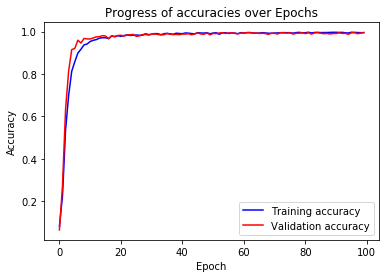

In [23]:
# Plotting progress of training and validation accuracies over epochs

acc_history = np.transpose(np.array(acc_hist))
plt.plot(acc_history[0], 'b')  # training accuracy
plt.plot(acc_history[1], 'r')  # validation accuracy
plt.title('Progress of accuracies over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy','Validation accuracy'],loc=0)
plt.show()

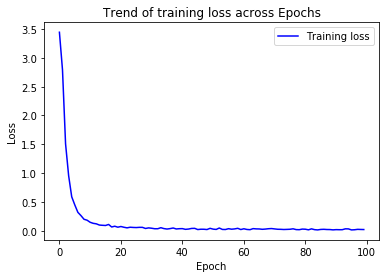

In [24]:
# Plotting trend of training loss across epochs

loss_history = np.transpose(np.array(loss_hist))
plt.plot(loss_history, 'b')  # training loss
plt.title('Trend of training loss across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss'],loc=0)
plt.show()

In [25]:
# Computing & reporting accuracy, averaged macro-precision, macro-recall, F1_score for the test set
# https://stackoverflow.com/questions/9004172/precision-recall-for-multiclass-multilabel-classification

true_pos = [float(test_conf_mat[i][i]) for i in range(n_classes)]
sum_class_preds = [sum(test_conf_mat[i]) for i in range(n_classes)]
sum_class_actuals = [sum(np.transpose(test_conf_mat)[i]) for i in range(n_classes)]

# # accuracy = tp/(no. of examples)
accuracy = round(sum(true_pos)/np.sum(test_conf_mat),4)
print("Averaged accuracy on the test set is: ", accuracy*100,"%")

# precision = tp/(tp+fp)
precision = round(np.mean(np.divide(true_pos,sum_class_preds)),4)
print("Macro-average precision on test set is: ", precision*100,"%")

# recall = tp/(tp+fn)
recall = round(np.mean(np.divide(true_pos,sum_class_actuals)),4)
print("Macro-average recall on test set is: ", recall*100,"%")

# F1_score = 2*precision*recall/(precision + recall)
score_f1 = round(2*precision*recall/(precision + recall), 4)
print("F1 score on test set is: ", score_f1*100, "%")

Averaged accuracy on the test set is:  98.47 %
Macro-average precision on test set is:  97.61 %
Macro-average recall on test set is:  96.77 %
F1 score on test set is:  97.19 %


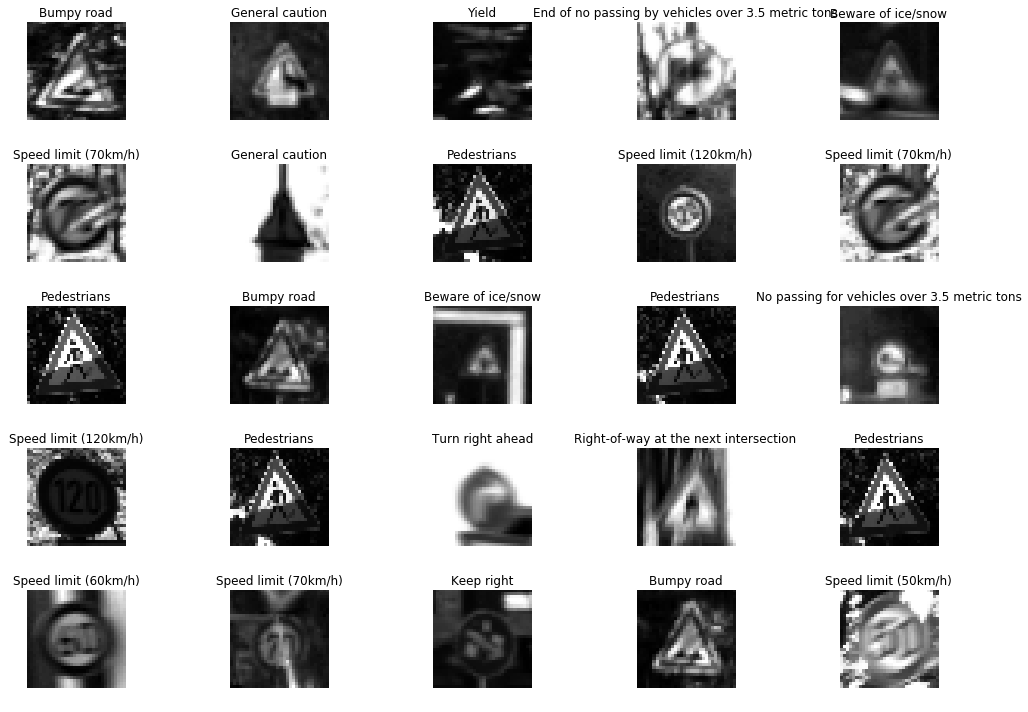

In [32]:
### Visualizing some of the test images that the network was unable to classify accurately
import random

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_CNN2')
    
    predicts, actuals = sess.run([pred,ground_truth], feed_dict = {x: X_test, y: y_test, prob_keep: 1.0})

incorrect_preds = set(i for i in range(len(predicts)) if predicts[i] != actuals[i])

fig, axs = plt.subplots(5,5, figsize=(14, 10))
axs = axs.ravel()

rand_inds = random.sample(incorrect_preds, 25)
for i in range(25):
    axs[i].axis('off')
    axs[i].imshow(X_test[rand_inds[i]].squeeze(), cmap = 'gray')
    axs[i].set_title(sign_dict[y_test[rand_inds[i]]])
plt.tight_layout()
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

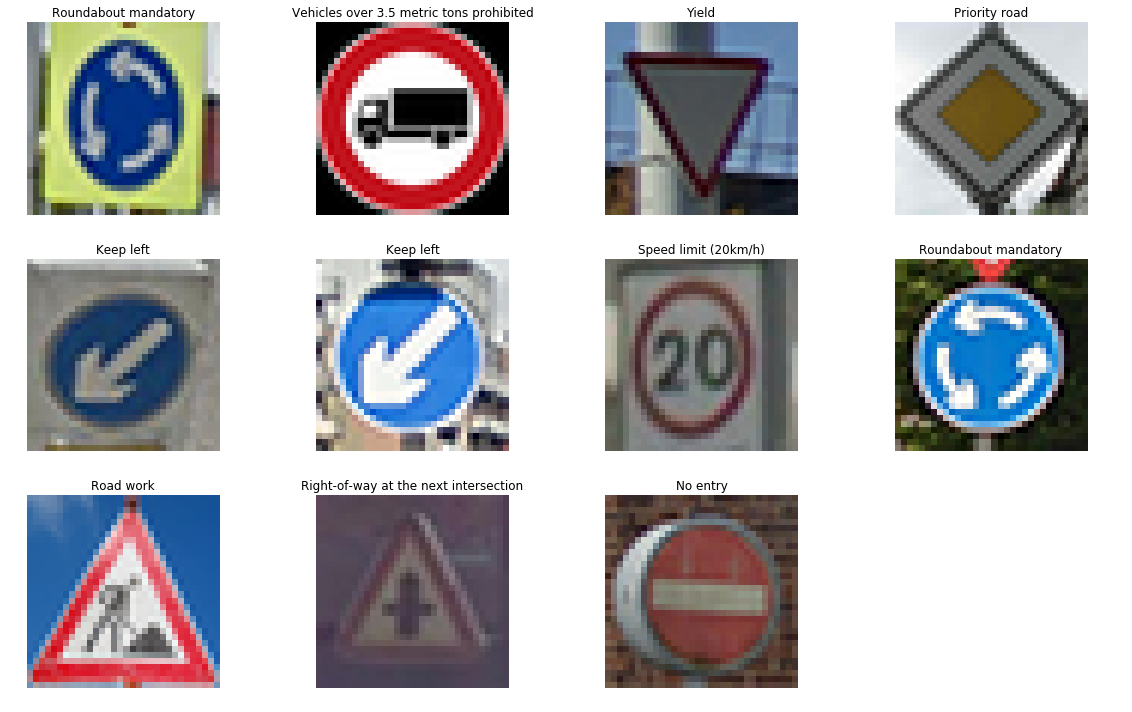

In [33]:
### Loading custom images take from the internet, reshaping them to 32x32 and then plotting them

from os import listdir
from PIL import Image
import matplotlib.pyplot as plt

filenames = ['./Test_images_custom/'+x for x in listdir('./Test_images_custom')]

X_test_new = []
for img_file in filenames:
    image = Image.open(img_file)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.array(list(image.getdata()), dtype='uint8')
    image = np.reshape(image, (32, 32, 3))

    X_test_new.append(image)
    
X_test_new = np.array(X_test_new, dtype='uint8')
y_test_new = [40, 16, 13, 12, 39, 39, 0, 40, 25, 11, 17]

fig, axs = plt.subplots(3,4, figsize=(16, 10))
axs = axs.ravel()

for i in range(12):
    axs[i].axis('off')
    if i <= 10:
        axs[i].imshow(X_test_new[i])
        axs[i].set_title(sign_dict[y_test_new[i]])
plt.tight_layout()
plt.show()

### Predict the Sign Type for Each Image & Analyze Performance

Accuracy on custom images = 100.00 %


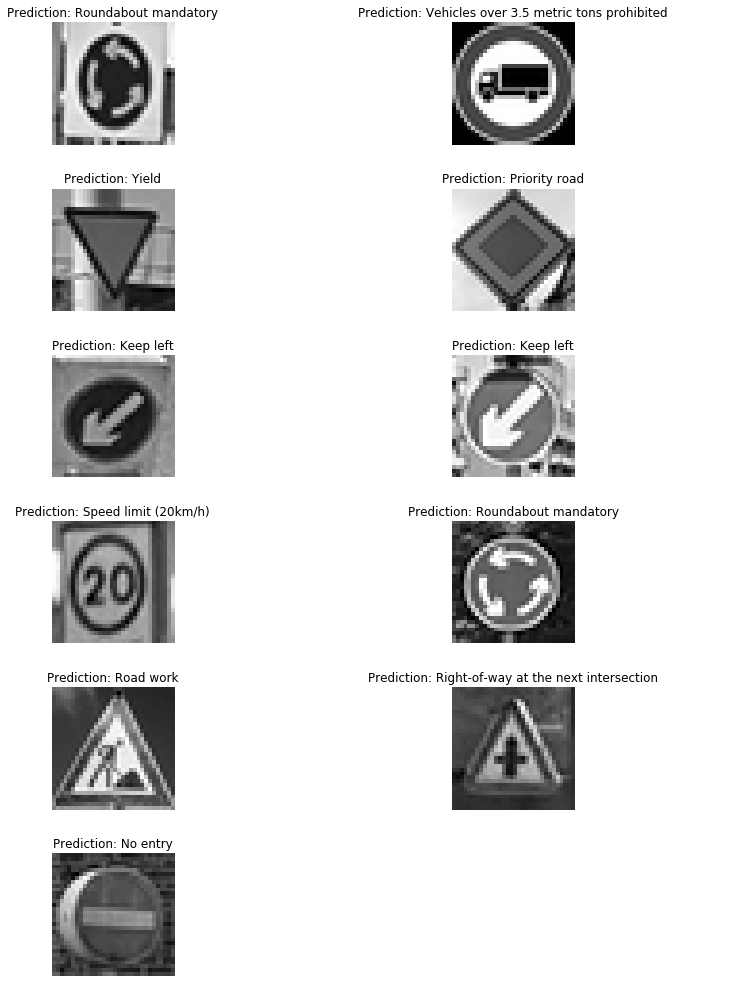

In [34]:
# Preprocessing images and then predicting labels for each of the custom images using the trained model
# Determine accuracy using these predictions
# Plotting preprocessed images along with their predicted labels
        
X_test_new2 = preprocessing(X_test_new, hist_equalize=False).reshape(*X_test_new.shape[:-1], -1)
y_test_new = [40, 16, 13, 12, 39, 39, 0, 40, 25, 11, 17]

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_CNN2')
    y_pred_new = sess.run(pred, feed_dict = {x: X_test_new2, y: y_test_new, prob_keep: 1.})

sign_accuracy = sum(np.equal(y_pred_new, y_test_new))/float(len(y_test_new))
print("Accuracy on custom images = {:.2f} %".format(sign_accuracy*100))

titles = ["Prediction: "+sign_dict[pred] for pred in y_pred_new]

fig, axs = plt.subplots(6,2, figsize=(12, 14))
axs = axs.ravel()

for i in range(12):
    axs[i].axis('off')
    if i <= 10:
        axs[i].imshow(X_test_new2[i].squeeze(), cmap = 'gray')
        axs[i].set_title(titles[i])
plt.tight_layout()
plt.show()

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

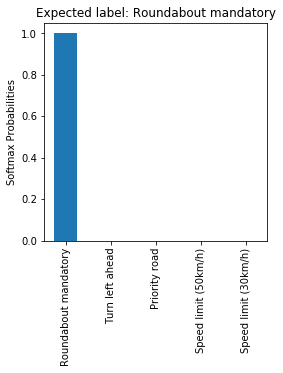

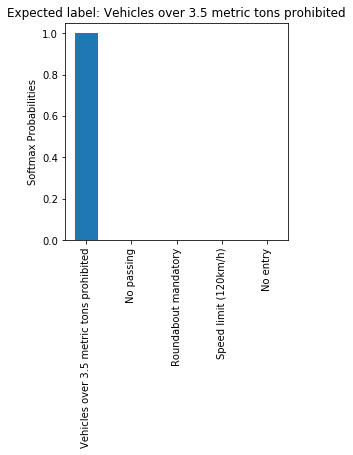

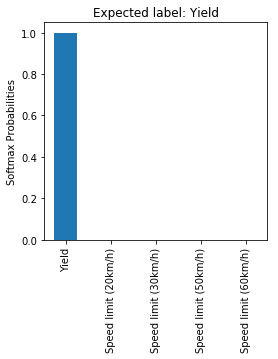

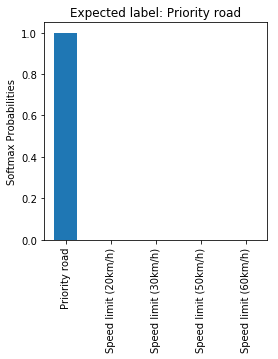

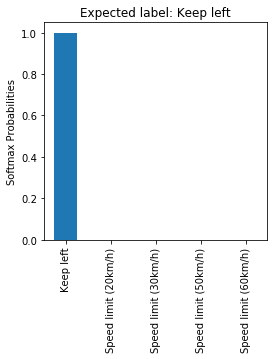

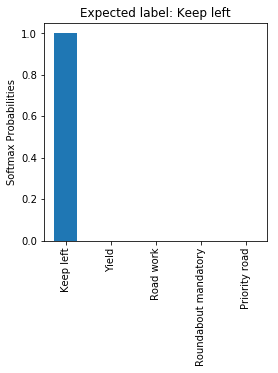

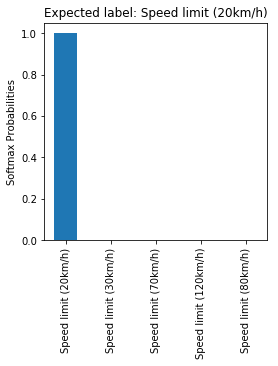

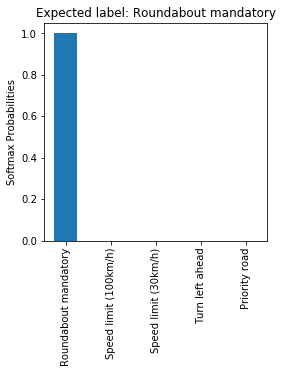

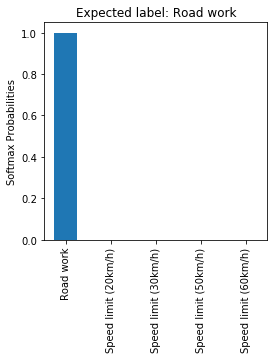

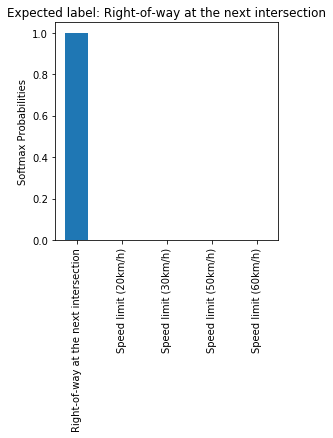

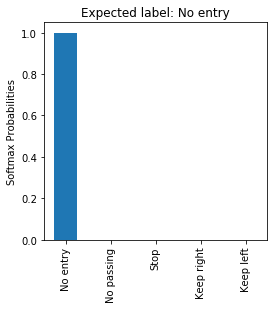

In [35]:
### Plotting the top five softmax probabilities for the predictions on the German traffic sign images found on the web

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_CNN2')
    
    logit_vals = sess.run(logits, feed_dict = {x: X_test_new2, y: y_test_new, prob_keep: 1.})
    probs = tf.nn.softmax(logit_vals)
    result_top5 = sess.run(tf.nn.top_k(probs, k=5))
    
    for idx,_ in enumerate(y_pred_new):
        tick_labels = [sign_dict[top5_label] for top5_label in result_top5[1][idx]]
        y_pos = np.arange(5)
        plt.figure(figsize=(4,4))
        plt.bar(y_pos, result_top5[0][idx], align='center', width=0.5)
        plt.xticks(y_pos, tick_labels, rotation='vertical')
        plt.ylabel('Softmax Probabilities')
        plt.title('Expected label: {}'.format(sign_dict[y_test_new[idx]]))
        plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [36]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")